<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Файл-с-данными,-общая-информация" data-toc-modified-id="Файл-с-данными,-общая-информация-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Файл с данными, общая информация</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Переименовывание-столбцов" data-toc-modified-id="Переименовывание-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Переименовывание столбцов</a></span></li><li><span><a href="#Поиск-и-обработка-дубликатов" data-toc-modified-id="Поиск-и-обработка-дубликатов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Поиск и обработка дубликатов</a></span></li><li><span><a href="#Поиск-и-обработка-пропусков-и-изменение-типов-данных" data-toc-modified-id="Поиск-и-обработка-пропусков-и-изменение-типов-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Поиск и обработка пропусков и изменение типов данных</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Портрет-пользователя-по-региону" data-toc-modified-id="Портрет-пользователя-по-региону-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя по региону</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Первая-гипотеза" data-toc-modified-id="Первая-гипотеза-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Первая гипотеза</a></span></li><li><span><a href="#Вторая-гипотеза" data-toc-modified-id="Вторая-гипотеза-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Вторая гипотеза</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Файл с данными, общая информация

Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед нами данные до 2016 года. Посмотрим на них.

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#считываем датасет
df = pd.read_csv('/datasets/games.csv')

#выводим 10 строк датафрейма
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6944,Are You Smarter than a 5th Grader? Game Time,DS,2009.0,Puzzle,0.22,0.00,0.00,0.02,NaN,tbd,E
2774,Lego Batman 3: Beyond Gotham,PS3,2014.0,Action,0.33,0.28,0.00,0.12,NaN,6.7,E10+
6505,Armored Core: Nexus,PS2,2004.0,Simulation,0.06,0.05,0.14,0.02,73.0,8.7,T
1615,Madden NFL 17,XOne,2016.0,Sports,1.08,0.02,0.00,0.13,83.0,5.9,E
13956,The Idolm@ster: Must Songs - Red Board / Blue ...,PSV,2015.0,Misc,0.00,0.00,0.04,0.00,NaN,NaN,NaN
6023,Madden NFL 08,XB,2007.0,Sports,0.22,0.06,0.00,0.01,76.0,6,E
1901,Joust,2600,1982.0,Platform,1.01,0.06,0.00,0.01,NaN,NaN,NaN
15285,Jissen Pachi-Slot Hisshouhou! Mister Magic Neo,PS2,2007.0,Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN
5443,Bejeweled 3,DS,NaN,Puzzle,0.29,0.02,0.00,0.02,75.0,tbd,E
2837,Major League Baseball 2K7,X360,2007.0,Sports,0.67,0.00,0.00,0.06,79.0,7.1,E


In [2]:
#выводим общую информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Для удобства создадим словарь:

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Видно, что не все названия столбцов приведены к нижнему регистру. Также присутствуют пропуски в некоторых столбцах. Проведем предобработку данных.

## Предобработка данных

### Переименовывание столбцов

Приведем названия столбцов к нижнему регистру

In [3]:
df.columns = df.columns.str.lower()

#проверяем
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Поиск и обработка дубликатов

Поищем явные дубликаты

In [4]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют. Поищем неявные дубликаты в столбцах со строковыми значениями.

In [5]:
#выведем уникальные значения столбца "рейтинг"
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Рейтинги ESRB:

"EC" ("Early childhood") - "Для детей младшего возраста" (от 3 лет)

"E" ("Everyone") — "Для всех" (старше 6 лет)

"K-A" ("Kids to adults") - "Для всех" (до 1998 года далее был заменен на "E")

"E10+" ("Everyone 10+") - "Для всех" (старше 10 лет)

"T" ("Teen") - "Для подростков" (старше 13 лет)

"M" ("Mature") - "Для зрелых подростков" (старше 17 лет)

"AO" ("Adults only") - "Только для взрослых" (старше 18 лет)

"RP" ("Rating pending") - "Рейтинг ожидается" (продукт ожидает присвоения рейтинга)

In [6]:
#посмоттрим на количество строк с рейтингом "K-A"
df.query('rating == "K-A"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
656,Theme Hospital,PC,1997.0,Strategy,2.30,0.10,0.00,0.00,NaN,9,K-A
903,PaRappa The Rapper,PS,1996.0,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A
16681,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A


In [7]:
#посмотрим на количество строк с рейтингом "RP"
df.query('rating == "RP"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13672,Clockwork Empires,PC,NaN,Strategy,0.0,0.04,0.0,0.00,58.0,3.8,RP
14270,Supreme Ruler: Cold War,PC,2011.0,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.0,0.01,0.0,0.00,65.0,NaN,RP


Неявные дубликаты отсутствуют, но можно было бы категоризировать данные, т.к. некоторые рейтинги между собой схожи. Например, рейтинг "T" и "M" или "K-A" и "E" или например, строку с рейтингом "RP" можно было бы вообще удалить, но посмотрим и решим нужно ли нам это делать на этапе очистке данных. Может быть при очистке эти строки итак уйдут. Решим позже.


In [8]:
#выведем уникальные значения столбца "жанр"
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Неявные дубликаты в столбце "жанр" отсутствуют

In [9]:
#выведем уникальные значения столбца "пользовательский рейтинг"
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Неявные дубликаты в данном столбце искать не стоит, т.к. столбец `user_score` явно должен быть типа float, но из-за значения 'tbd' он является строковым. Также присутствуют пропуски. Пропуски и значение 'tbd' обработаем в следующем пункте исследования.

### Поиск и обработка пропусков и изменение типов данных

Посмотрим еще раз в каких столбцах присутствуют пропуски

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Начнем со столбца "год выпуска"

In [11]:
#посчитаем количество пропусков
df['year_of_release'].isna().sum()

269

In [12]:
#посчитаем процент пропусков от общего количества значений в столбце "год выпуска"
f"{len(df[df['year_of_release'].isna()]) / len(df['year_of_release']):.2%}"

'1.61%'

Количество пропусков присутствует в 269 строках, что составляет всего 1.61% от общего количества значений. Столь малое количество строк не повлияет на статистики, поэтому удалим данные строки из датафрейма.

In [13]:
df.dropna(subset=['year_of_release'], inplace=True)

#проверим
df['year_of_release'].isna().sum()

0

Поменяем тип данных столбца `year_of_release` с int на float

In [14]:
df['year_of_release'] = df['year_of_release'].astype(int)

#проверим
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Поработаем со столбцом "название игры"

In [15]:
#посчитаем количество пропусков
df['name'].isna().sum()

2

In [16]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего 2 пропуска. Удалим данные строки.

In [17]:
df.dropna(subset=['name'], inplace=True)

#проверим
df['name'].isna().sum()

0

Поработаем со столбцами `critic_score`, `user_score` и `rating`.

In [18]:
#посчитаем количество пропусков
df['critic_score'].isna().sum()

8461

In [19]:
#посчитаем процент пропусков от общего количества значений в столбце
f"{len(df[df['critic_score'].isna()]) / len(df['critic_score']):.2%}"

'51.45%'

In [20]:
#посчитаем количество пропусков
df['user_score'].isna().sum()

6605

In [21]:
#посчитаем процент пропусков от общего количества значений в столбце
f"{len(df[df['user_score'].isna()]) / len(df['user_score']):.2%}"

'40.17%'

In [22]:
#посчитаем количество пропусков
df['rating'].isna().sum()

6676

In [23]:
#посчитаем процент пропусков от общего количества значений в столбце
f"{len(df[df['rating'].isna()]) / len(df['rating']):.2%}"

'40.60%'

Для дальнейшего корректного распределения, а также для того, чтобы игры с неизвестным рейтингом тоже принимали участие в исследовании заменим пропуски в столбце `rating` на значение 'unknown'

In [24]:
df.loc[df['rating'].isna(), 'rating'] = 'unknown'

Пропуски в столбцах `critic_score`, `user_score` и `rating` составляют от 40% до 50%. Из-за невозможности заполнения оставим их как есть, дабы не искажать статистики.

Поработаем со значением 'tbd' в столбце `user_score`

In [25]:
#посмотрим на срез данных по значению "tbd"
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [26]:
#посмотрим на количество игр с пользовательской оценкой "tbd" в разрезе игровых жанров
df.query('user_score == "tbd"').pivot_table(index=['genre'], values=['name'], aggfunc='count').reset_index()

,genre,name
0,Action,368
1,Adventure,156
2,Fighting,37
3,Misc,440
4,Platform,135
5,Puzzle,208
6,Racing,229
7,Role-Playing,30
8,Shooter,95
9,Simulation,233


tbd  - To Be Determined, т.е. "будет определено". Из среза видно, что игры малоизвестные и "нишевые". Данные игры мало покупали соответственно и мало оценивали. В связи с этим этим играм не хватает оценок вывести хоть какую-нибудь среднепользовательскую оценку. Заменим значение 'tbd' в столбце `user_score` на NaN.

In [27]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

#проверим
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Теперь изменим тип данных столбца `user_score`со строкового на числовой

In [28]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

#проверим
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец

In [29]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

#проверим
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1438,The Simpsons: Hit & Run,XB,2003,Racing,0.70,0.58,0.00,0.07,NaN,NaN,unknown,1.35
11913,Kenyuu Densetsu Yaiba,SNES,1994,Action,0.00,0.00,0.07,0.00,NaN,NaN,unknown,0.07
4597,Test Drive,XB,2002,Racing,0.35,0.05,0.00,0.02,71.0,8.7,T,0.42
12897,Sega Soccer Slam,XB,2002,Sports,0.04,0.01,0.00,0.00,80.0,8.5,E,0.05
10327,Pachi-Slot Aruze Oukoku 3,PS,2000,Misc,0.00,0.00,0.10,0.01,NaN,NaN,unknown,0.11


## Исследовательский анализ данных

Посмотрим сколько игр выпускалось в разные годы

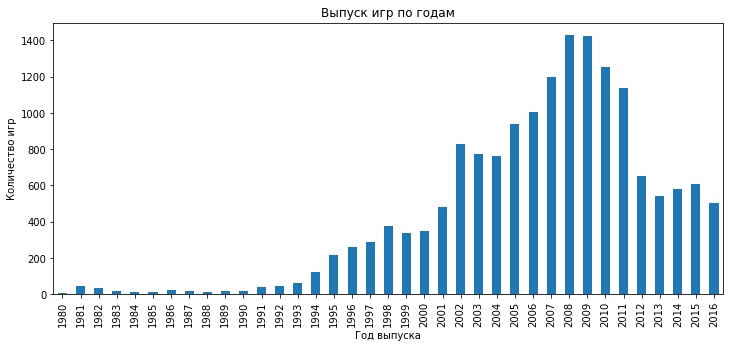

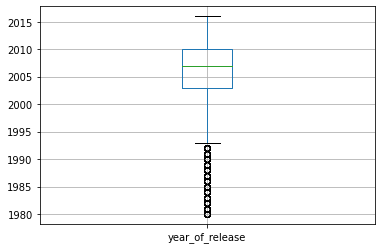

In [30]:
df.groupby('year_of_release')['name'].agg('count') \
    .plot(kind = 'bar', 
          y = 'name',
          ylabel = 'Количество игр',
          xlabel = 'Год выпуска', 
          figsize = (12,5)) \
    .set_title('Выпуск игр по годам');
plt.show()

df.boxplot('year_of_release')
plt.show()

In [31]:
#посмотрим на числовое описание
df['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Выпуск игр начинается с 1980 года. В период с 1980 по 1994 год выпускалось не более 50 игр в год. Далее производство игр наращивается. Пик выпуска игр приходится на 2007-2010 гг. Медиана - 2007 год. Гистограмма скошена вправо. Присутствуют выбросы ранее 1994 года. Давайте посмотрим на них.

In [32]:
df.query('year_of_release < 1994')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,unknown,20.62
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,unknown,18.14
...,...,...,...,...,...,...,...,...,...,...,...,...
14610,Doom,PC,1992,Shooter,0.02,0.00,0.00,0.00,85.0,8.2,M,0.02
14621,SimCity,PC,1988,Simulation,0.00,0.02,0.00,0.01,64.0,2.2,E10+,0.03
15692,Empire Deluxe,PC,1992,Strategy,0.02,0.00,0.00,0.00,NaN,NaN,unknown,0.02
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,unknown,0.02


In [33]:
#посчитаем процент игр ранее 1994 год от общего количества значений
f"{len(df[df['year_of_release'] < 1994]) / len(df['year_of_release']):.2%}"

'2.22%'

Всего 2.22 % от общего количества. Удалять не будем.

Посмотрим на распределение продаж по платформам

In [34]:
(
df
.pivot_table(index='platform', values='total_sales', aggfunc='sum')
.sort_values('total_sales', ascending=False)
.reset_index()
)


,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Выберем платформы с наибольшими продажами

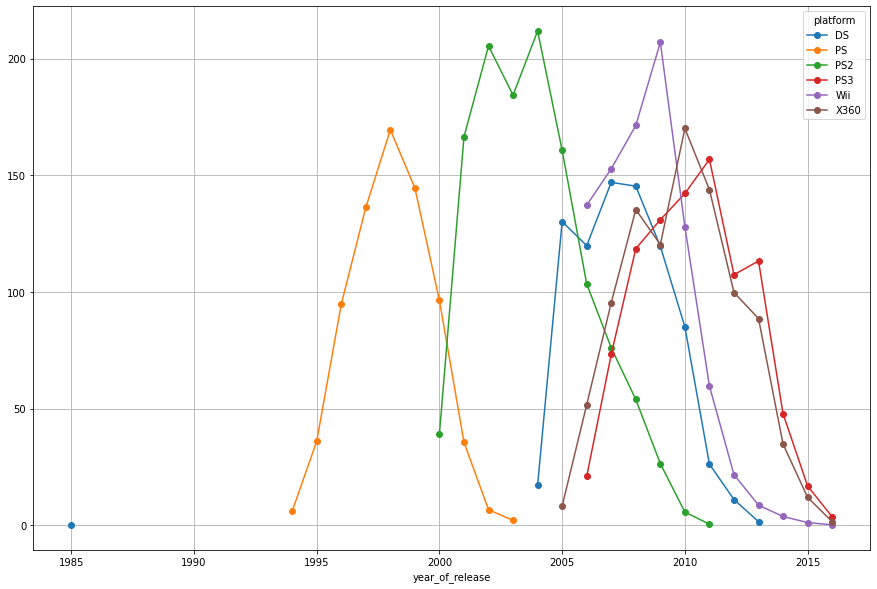

In [35]:
#составим список платформ с наибольшими продажами
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

#посмотрим распределение продаж по годам по данным платформам 
(
df
    .query('platform in @top_platforms')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=sum)
    .plot(figsize=(15, 10), style='o-',  grid=True)
)
plt.show()

In [36]:
#посмотрим на "аномальную точку" в 1985 году
df.query('(platform in @top_platforms) and (year_of_release <= 1985)')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02


График скошен вправо из-за "аномалии", т.к. Nintendo DS начал выпускаться только в 2004 году. Удалим ее для лучшей визуализации.

In [37]:
df = df.drop(axis=0, index=15957)

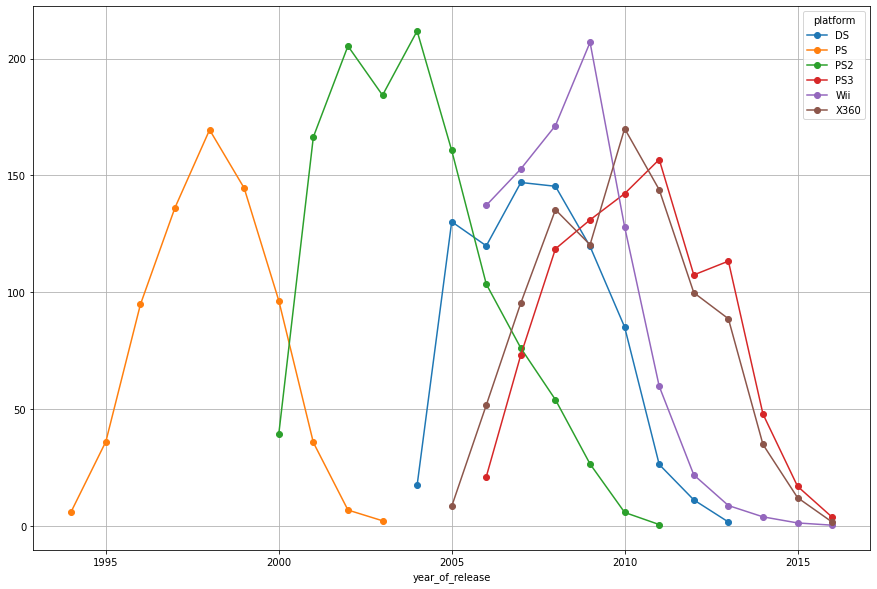

In [38]:
#посмотрим распределение продаж по годам по данным платформам еще раз
(
df
    .query('platform in @top_platforms')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=sum)
    .plot(figsize=(15, 10), style='o-',  grid=True)
)
plt.show()

Судя по графику в среднем приставки "живут" 10 лет. Их апгрейды появляются каждые 5 лет. Больше всего продаж в датафрейме у приставок, которые уже закончили или заканчивают свой "жизненный цикл". На график не попали приставки, у которых еще мало продаж: это могут быть приставки, которые не рентабельны или в то же время могут быть приставки, которые были выпущены не так давно и не достигли своего пика. Возьмем данные за период с 2014 год по 2016 год.

In [39]:
#возьмем актуальный период 2014 - 2016 гг, остальное отсечем
actual_df = df.query('2014 <= year_of_release')
actual_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


Посмотрим на распределение продаж по платформам за период с 2014 года по 2016 год

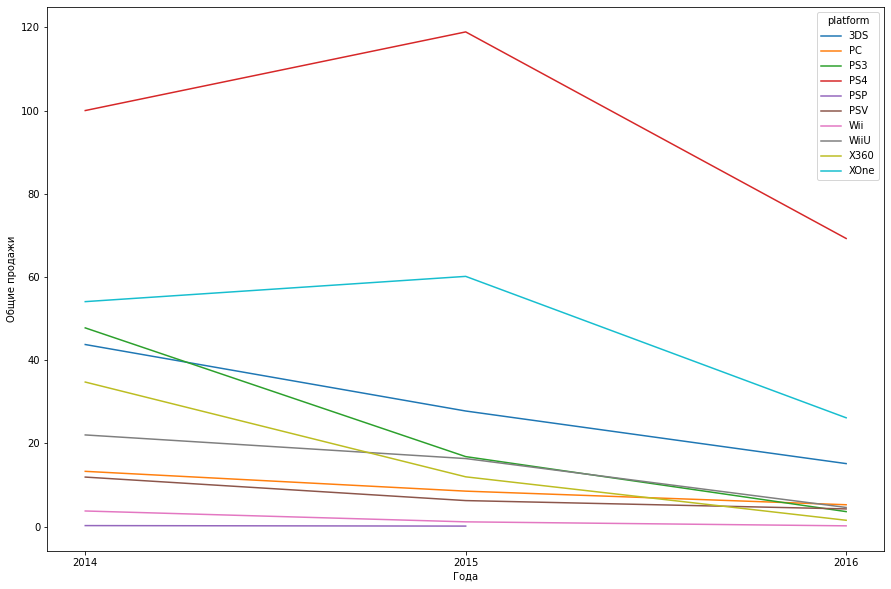

In [40]:
(
actual_df 
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=sum)
    .plot
        (figsize=(15, 10), 
         style='-',  
         ylabel = 'Общие продажи',
         xlabel = 'Года',
         xticks = [2014, 2015, 2016])
)
plt.show()

In [41]:
#посмотрим на продажи в разрезе платформ в порядке убывания
(
actual_df
.pivot_table(index='platform', values='total_sales', aggfunc='sum')
.sort_values('total_sales', ascending=False)
.reset_index()
)

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


В топ-5 по продажам: 2 платформы от Sony, 2 от Microsoft и 1 от Nintendo. PS3, X360, Nintendo 3DS заканчивают свой жизненный цикл - у них заметный даунгрейд на графике. В то же время на 1ом и 2ом местах следующие потенциально прибыльные поколения от Sony и Microsoft - это PS4 и XOne соответственно. Данные приставки хоть и были выпущены в 2013 году, но не прошли и половины своего "жизненного пути", поэтому считаю, что производство игр для данных платформ будет только наращиваться. 

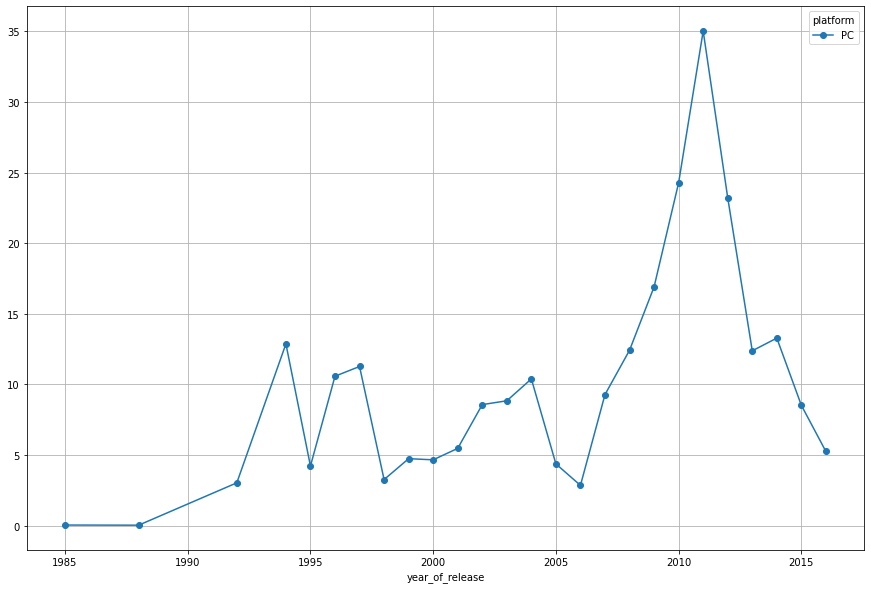

In [42]:
#посмотрим распределение продаж по годам по PC(персональный компьютер)
(
df
    .query('platform == "PC"')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=sum)
    .plot(figsize=(15, 10), style='o-',  grid=True)
)
plt.show()

Считаю, что в потенциально прибыльные стоит добавить PC, т.к. компьютеры никуда не деваются и не собирают деваться из нашей жизни, а игры зачастую выпускают одновременно на нескольких платформах + персональный компьютер. Даже если какая-то платформа выпускает эксклюзивы, то через какое-то время данные экслюзивные игры появляются и на PC. Также судя по графику продажи игр на PC, начиная с 1988 года, достаточно стабильные, хоть и не такие большие, как у консолей. Думаю это связано с тем, что игры на PC достаточно легко скачать нелегально.

Построим боксплоты по отобранным потенциально прибыльным платформам

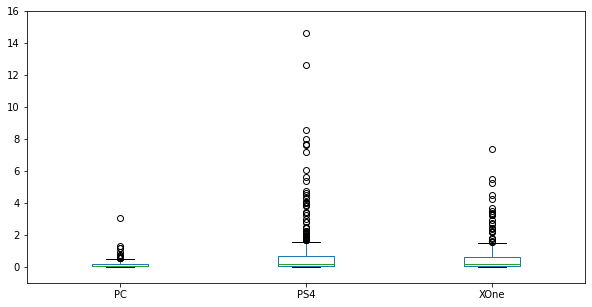

In [43]:
#сначала построим боксплоты со всеми выбросами
actual_top_platforms = ['PS4', 'XOne', 'PC']
(
actual_df
    .query('platform in @actual_top_platforms')
    .pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')
    .plot(kind='box', figsize=(10,5), ylim=(-1,16))
)
plt.show()

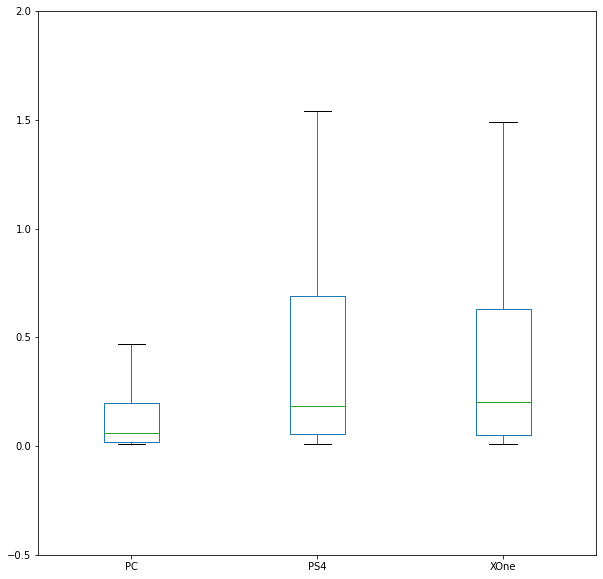

In [44]:
#теперь построим боксплоты без выбросов
actual_top_platforms = ['PS4', 'XOne', 'PC']
(
actual_df
    .query('platform in @actual_top_platforms')
    .pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')
    .plot
    (kind='box', 
     figsize=(10,10), 
     ylim=(-0.5,2),
    showfliers=False)
)
plt.show()

Боксплоты у PS4 и у XOne почти одинаковые, но вот выбросов у PS4 побольше. Аналогичность боксплотов между двумя платформами означает одинаковость распределения значений. У PC же и выбросов больше, чем у платформ и сам ящик меньше в связи с меньшими объемами продаж.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Возьмем PS4.

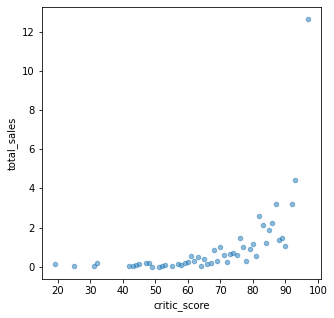

In [45]:
#построим диаграмму рассеяния по параметрам глобальные продажи и отзывы критиков
(
    actual_df
    .query('platform == "PS4"')
    .pivot_table(index='critic_score', values='total_sales')
    .reset_index()
    .plot(x='critic_score', y='total_sales', kind='scatter', figsize=(5, 5), alpha=0.5)
)
plt.show()

In [46]:
#посчитаем корреляцию между параметрами глобальные продажи и отзывы критиков
actual_df.query('platform == "PS4"')['total_sales'].corr(actual_df.query('platform == "PS4"')['critic_score'])

0.40266141068104083

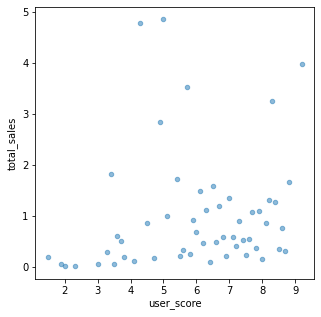

In [47]:
#построим диаграмму рассеяния по параметрам глобальные продажи и отзывы пользователей
(
    actual_df
    .query('platform == "PS4"')
    .pivot_table(index='user_score', values='total_sales')
    .reset_index()
    .plot(x='user_score', y='total_sales', kind='scatter', figsize=(5, 5), alpha=0.5)
)
plt.show()

In [48]:
#посчитаем корреляцию между параметрами глобальные продажи и отзывы пользователей
actual_df.query('platform == "PS4"')['total_sales'].corr(actual_df.query('platform == "PS4"')['user_score'])

-0.040131589472697356

Коэффициент корреляции между глобальными продажами и отзывами критиков - 0.43. 

Коэффициент корреляции между глобальными продажами и отзывами пользователей - 0.02. 

Видно, что между глобальными продажами и отзывами критиков присутствует линейная связь, в то время как между глобальными продажами и отзывами пользователей ее нет. Это видно и на диаграммах рассеяния: начиная от оценки критиков > 55 глобальные продажи игр на PS4 начинают подрастать, в то время как на диаграмме рассеяния с оценками пользователей все хаотично.

Посмотрим влияние оценок пользователей и критиков на глобыльные продажи игр в разрезе остальных потенциально прибыльных платформ

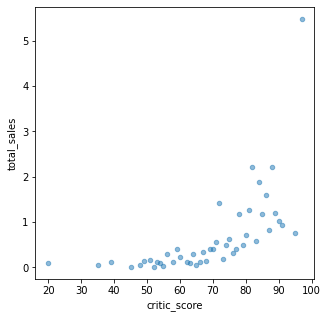

In [49]:
#построим диаграмму рассеяния по параметрам глобальные продажи и отзывы критиков по XOne
(
    actual_df
    .query('platform == "XOne"')
    .pivot_table(index='critic_score', values='total_sales')
    .reset_index()
    .plot(x='critic_score', y='total_sales', kind='scatter', figsize=(5, 5), alpha=0.5)
)
plt.show()

In [50]:
#посчитаем корреляцию между параметрами глобальные продажи и отзывы критиков по XOne
actual_df.query('platform == "XOne"')['total_sales'].corr(actual_df.query('platform == "XOne"')['critic_score'])

0.42867694370333226

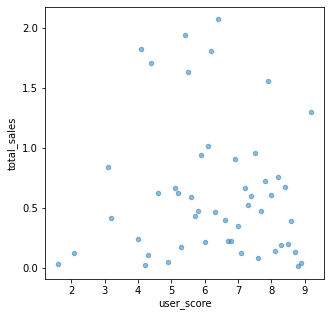

In [51]:
#построим диаграмму рассеяния по параметрам глобальные продажи и отзывы пользователей по XOne
(
    actual_df
    .query('platform == "XOne"')
    .pivot_table(index='user_score', values='total_sales')
    .reset_index()
    .plot(x='user_score', y='total_sales', kind='scatter', figsize=(5, 5), alpha=0.5)
)
plt.show()

In [52]:
#посчитаем корреляцию между параметрами глобальные продажи и отзывы пользователей по XOne
actual_df.query('platform == "XOne"')['total_sales'].corr(actual_df.query('platform == "XOne"')['user_score'])

-0.0703839280647581

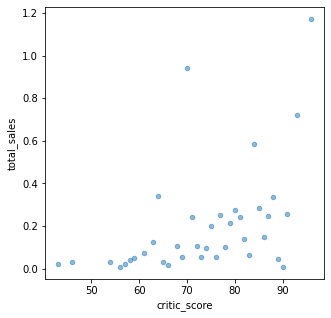

In [53]:
#построим диаграмму рассеяния по параметрам глобальные продажи и отзывы критиков по PC
(
    actual_df
    .query('platform == "PC"')
    .pivot_table(index='critic_score', values='total_sales')
    .reset_index()
    .plot(x='critic_score', y='total_sales', kind='scatter', figsize=(5, 5), alpha=0.5)
)
plt.show()

In [54]:
#посчитаем корреляцию между параметрами глобальные продажи и отзывы критиков по PC
actual_df.query('platform == "PC"')['total_sales'].corr(actual_df.query('platform == "PC"')['critic_score'])

0.17463413769350036

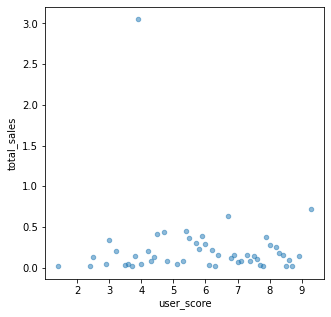

In [55]:
#построим диаграмму рассеяния по параметрам глобальные продажи и отзывы критиков по PC
(
    actual_df
    .query('platform == "PC"')
    .pivot_table(index='user_score', values='total_sales')
    .reset_index()
    .plot(x='user_score', y='total_sales', kind='scatter', figsize=(5, 5), alpha=0.5)
)
plt.show()

In [56]:
#посчитаем корреляцию между параметрами глобальные продажи и отзывы пользователей по PC
actual_df.query('platform == "PC"')['total_sales'].corr(actual_df.query('platform == "PC"')['user_score'])

-0.07159665703472452

Коэффициент корреляции между глобальными продажами и отзывами критиков - 0.46 (XONe).

Коэффициент корреляции между глобальными продажами и отзывами пользователей - (- 0.04) (XONe).

Коэффициент корреляции между глобальными продажами и отзывами критиков - 0.36 (PC).

Коэффициент корреляции между глобальными продажами и отзывами пользователей - (- 0.02) (PC).

Аналогичная ситуация, как и с PS4: между оценками критиков и глобальными продажами есть линейная связь. Чем выше оценки, тем больше продажи. В то же время связь между оценками пользователей и глобальными продажа как у XOne, так и у PC  - отсутствует.


Посмотрим на общее распределение игр по жанрам за период с 2010 по 2015 года

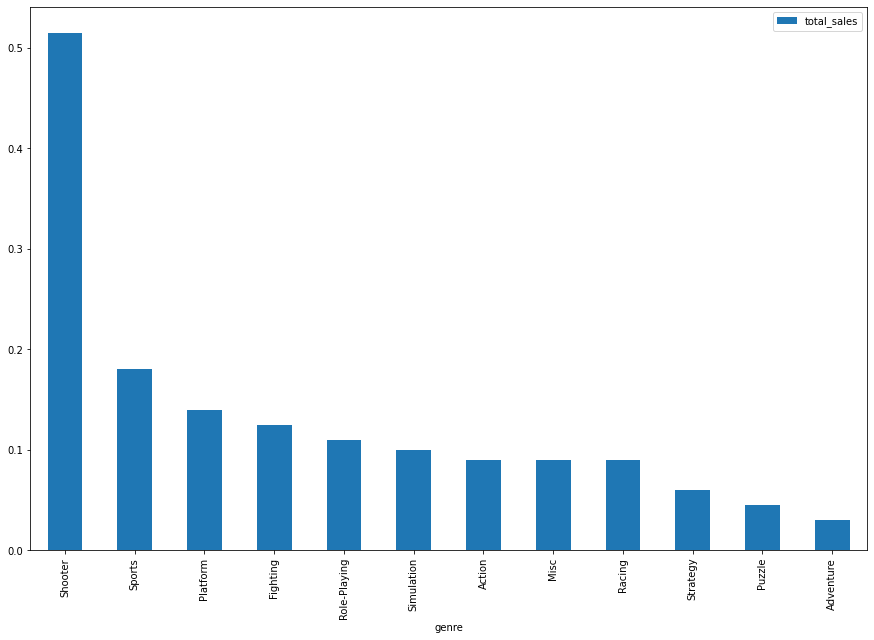

In [57]:
(
actual_df 
    .pivot_table(index='genre', values='total_sales', aggfunc='median')
    .sort_values(by='total_sales', ascending=False)
    .plot(figsize=(15, 10), kind='bar')
)
plt.show()

Самый продаваемый жанр - Shooter. Данный жанр впереди всех. Далее Sports, Platform и Fighting.

Наименее прибыльные жанры - Puzzle и Adventure.

## Портрет пользователя по региону

Определим для пользователя каждого региона - Северная Америка, Европа и Япония - топ-5 самых популярных платформ

In [58]:
#создадим переменную с регионами
regions = actual_df[['na_sales', 'eu_sales', 'jp_sales']]

#создадим функцию, которая будет проходить по каждому региону и "рисовать" круговую диаграмму, показывающую распределение
#продаж по платформам в общем объеме продаж по данному региону, а также после каждой диаграммы выводить топ-5 платформ
def user_platform(region):
    for region in regions:
        (
        actual_df.pivot_table(index='platform', values=region, aggfunc=sum)
        .sort_values(by=region, ascending=False)
        .plot(figsize=(10, 10), kind='pie', subplots=True)
        )
        plt.show()
        display(
        actual_df
            .pivot_table(index='platform', values=region, aggfunc=sum)
            .sort_values(by=region, ascending=False)
            .reset_index()
            .head()
        )
    return

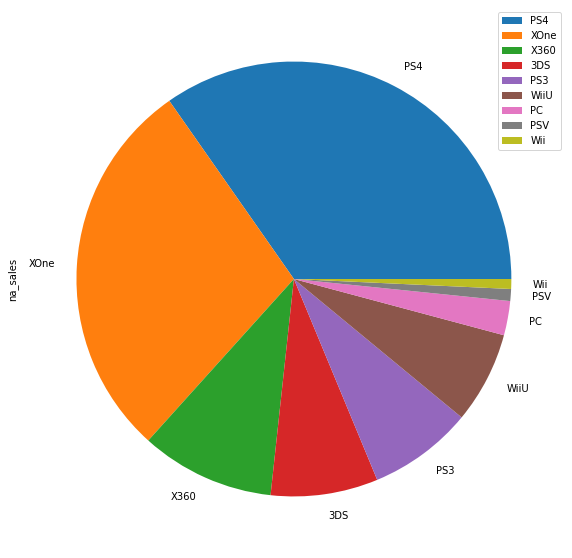

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


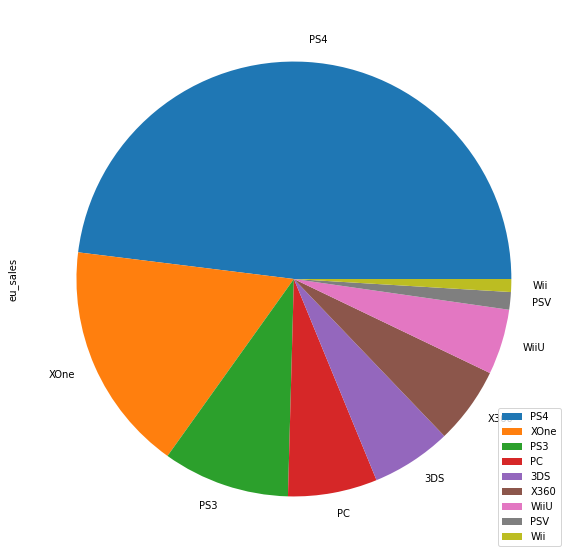

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12


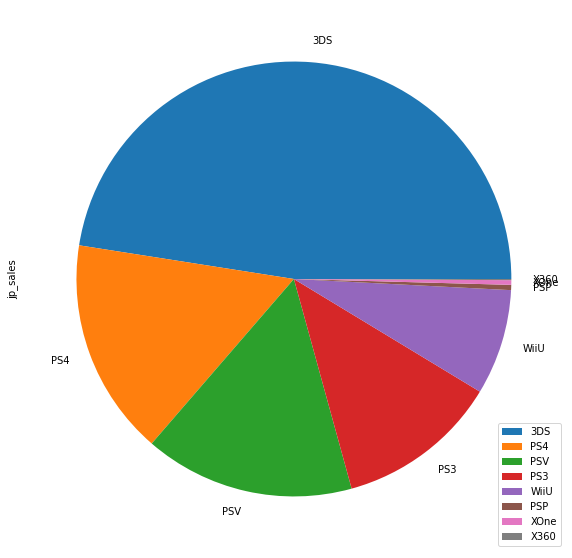

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


In [59]:
user_platform(regions)

В Северной Америке на первом месте по продажам находится устаревшая модель консоли местного производства - X360. Далее идет также устаревшая модель PS3, а потом Wii. На 4ом и 5ом месте находятся модели нового поколения PS4 и XOne соответственно.

В Европе 1 и 2 место также между собой поделили PS3 и X360, но вот на 3ем месте модель нового поколения PS4 и по продажам даже больше, чем в Северной Америке. На пятом месте расположился PC, а вот новой XOne вообще в топе нет.

В Японии весь топ-5 занимают платформы от японских компаний. Интересно, что 4 места из 5 занимают портативные консоли. 

Самые популярные жанры (топ-5) для пользователя каждого региона

In [60]:
#создадим функцию, которая будет проходить по каждому региону и "рисовать" круговую диаграмму, показывающую распределение
#продаж по жанрам в общем объеме продаж по данному региону, а также после каждой диаграммы выводить топ-5 жанров
def user_genre(region):
    for region in regions:
        (
        actual_df.pivot_table(index='genre', values=region, aggfunc=sum)
        .sort_values(by=region, ascending=False)
        .plot(figsize=(10, 10), kind='pie', subplots=True)
        )
        plt.show()
        display(
        actual_df
            .pivot_table(index='genre', values=region, aggfunc=sum)
            .sort_values(by=region, ascending=False)
            .reset_index()
            .head()
        )
    return

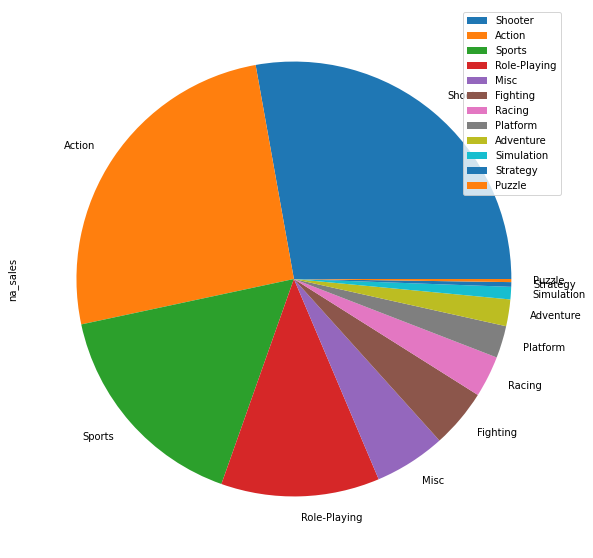

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05


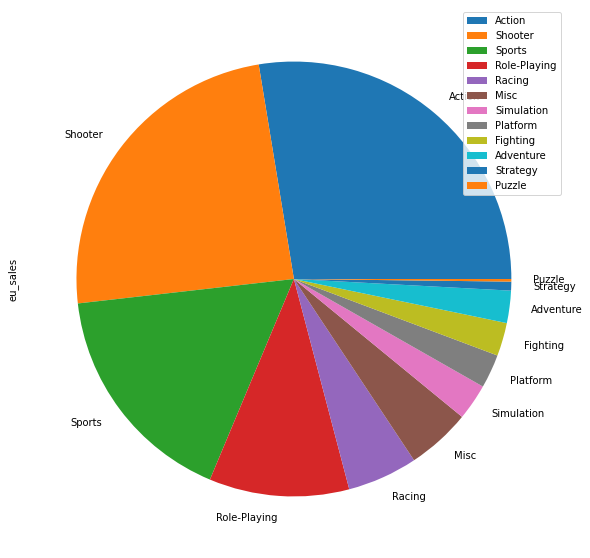

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13


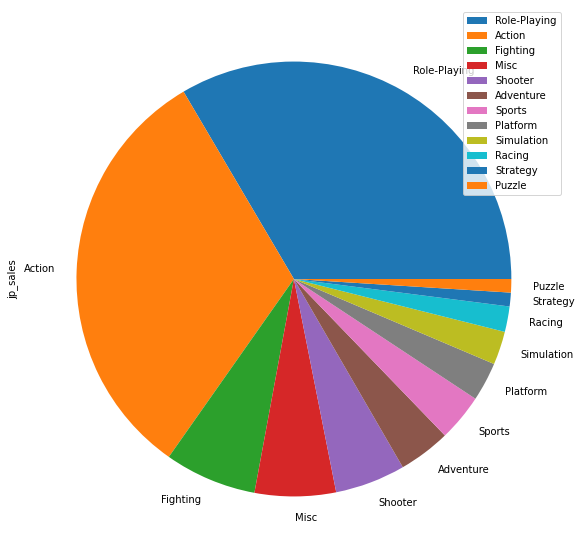

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87


In [61]:
user_genre(regions)

В Северной Америке как и в Европе одинаковые топ-5 игровых жанров. На первых трех местах этих регионов расположились следующие жанры: Action, Shooter и Sports.

Топ-5 игровых жанров Японии выглядит поинтересней. На первом месте жанр Role-Playing, на втором опять же Action, а вот на третьем месте уже Misc. Платформенные игры тоже попали в топ-5 игровых жанров Японии на четвертое место.

In [62]:
#создадим функцию, которая будет проходить по каждому региону и "рисовать" барплот, показывающий распределение
#продаж по рейтингам ESRB в общем объеме продаж по данному региону
def user_rating(region):
    for region in regions:
        (
        actual_df.pivot_table(index='rating', values=region, aggfunc=sum)
        .sort_values(by=region, ascending=False)
        .plot(figsize=(5, 5), kind='bar')
        )
        plt.show()
    return

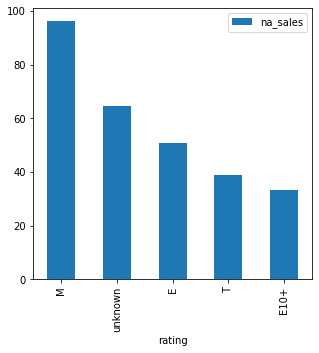

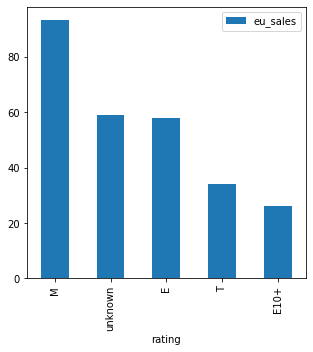

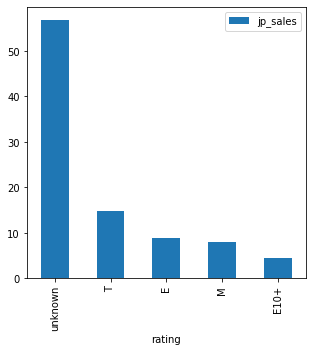

In [63]:
user_rating(regions)

Первые и вторые места в Северной Америке и Европе одинаковы: на первом месте игры рейтинга "М" (Mature) > 17 лет, на втором "E" (Everyone) > 6 лет. Далее в С. Америке идут игры с рейтингом "E10+" > 10 лет и игры с рейтингом "T" (Teen) > 13 лет. Затем идут игры с неизвестным рейтингом. В Европе наоборот на третьем месте игры с неизвестным рейтингом. Потом идут игры с рейтингом "T" (Teen) > 13 лет, а затем игры с рейтингом "E10+" > 10 лет.


В Японии на первом месте игры с неизвестным рейтингом. Далее игры с рейтингом "E" (Everyone) > 6 лет, а потом уже игры с рейтингом "T" (Teen) > 13 лет. 

ESRB - северо-американская организация по оценке игр и правилами ESRB запрещено размещать обозначения других рейтинговых систем вместе с их знаком, где бы то ни было, поэтому облепленные значками других рейтинговых систем диски встречаются только за пределами Северной Америки. Таким образом, продаж игр с рейтингом ESRB естественно больше в Северной Америке, а т.к. производство игр больше в С.Америке, чем в Европе, то и в Европе продажи игры с рейтингом ESRB больше, чем, например, продаж игр с рейтингом от местной системы оценки. А вот в Японии много игр выходят на локальный рынок, поэтому там оценивает их местная рейтинговая организация и на первом месте по продажам там локальные с "местным" рейтингом.


Пропусками в стобце `rating` скорее всего являются игры, которые ESRB не оценивала и данные игры были выпущены для локального рынка и оценивали их другие рейтинговые системы. Например в Европе это может быть PEGI(Pan European Game Information), а в Японии - CERO (Computer Entertainment Rating Organization).


Интересно, что присутствуют игры с рейтингом "RP" ("Rating pending") - "Рейтинг ожидается". Возможно это аномалия, т.к. с данным рейтингом в датафрейме с актуальным периодом только одна игра.

## Проверка гипотез

Нам необходимо проверить две гипотезы:
    
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 
 - Средние пользовательские рейтинги жанров Action и Sports  разные.

### Первая гипотеза

Для проверки первой гипотезы сформулируем нулевую гипотезу и альтернативную гипотезу:

H₀: среднепользовательская оценка Xbox One равна среднепользовательской оценки PC;

H₁: среднепользовательская оценка Xbox One не равна среднепользовательской оценки PC.

Уровень статистической значимости (alpha) = 0.05.

In [64]:
#создадим выборки по Xbox One и PC без пропусков в столбце user_score
x_one = actual_df.query('(platform == "XOne") and (~(user_score.isna()))')['user_score'].to_list()
pc = actual_df.query('(platform == "PC") and (~(user_score.isna()))')['user_score'].to_list()


In [65]:
from scipy import stats as st

alpha = .05 

#проводим  t-test, дисперсии не равны
results = st.ttest_ind(x_one, pc, equal_var = False)

print('p-значение:', results.pvalue) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Высока вероятность, что среднепользовательская оценка Xbox One равна среднепользовательской оценки PC

### Вторая гипотеза

Для проверки второй гипотезы также сформулируем нулевую гипотезу и альтернативную гипотезу:

H₀: среднепользовательская оценка жанра Action равна среднепользовательской оценки жанра Sports;

H₁: среднепользовательская оценка жанра Action не равна среднепользовательской оценки жанра Sports.

Уровень статистической значимости (alpha) = 0.05.

In [66]:
#для большего охвата данные возьмем из первоначального общего датафрейма

#создадим выборки по Action и Sports без пропусков в столбце user_score
action = actual_df.query('(genre == "Action") and (user_score.notna())')['user_score'].to_list()
sports = actual_df.query('(genre == "Sports") and (user_score.notna())')['user_score'].to_list()

In [67]:
#проводим  t-test, дисперсии не равны
g_results = st.ttest_ind(action, sports, equal_var = False)

print('p-значение:', g_results.pvalue) 

if g_results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Cреднепользовательская оценка жанра Action не равна среднепользовательской оценки жанра Sports. Высока вероятность, что средние пользовательские рейтинги жанров Action и Sports разные

## Общий вывод

**Представленные** для анализа данные содержали информацию о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**В процессе предварительной обработки** данных были выявлены пропуски значений в столбцах. В столбце "Год выпуска" пропуски составляли менее 2% от общего количества. Учитывая малое количество пропусков строки с пропусками в данном столбце были удалены. Пропуски в столбцах с оценками пользователей и с оценками критиков содержали  50% и 40% от общего количества значений в этих столбцах. Исходя из невозможности заполнить пропуски в данных столбцах было принято решение оставить как есть, дабы не искажать статистики. Пропуски в столбце со значениями рейтинга ESRB исходя из невозможности их заполнить заменили на значение "unknown" (в пер. с англ. "неизвестный"). Позднее, в ходе исследования выясним, что данные пропуски означают, что ESRB данные игры не оценивала.

**В ходе исследовательского анализа** данных выяснили, что выпуск игр начинается с 1980 года. В период с 1980 по 1994 год выпускалось не более 50 игр в год. В дальнейшем производство игр наращивается. Пик выпуска игр приходится на 2007-2010 гг.

Построив график продаж по шести платформ с наилучшими продажами за весь период выяснили, что "жизненный цикл" платформы в среднем составляет 10 лет и что каждые 5 лет у "живущей" платформы происходит ее апгрейд.

Учитывая, что цель нашего исследования  - прогнозирование, то дальнейшие выводы были сделаны исходя из актульного периоды, т.е. был сделан срез данных за 5 лет (2010-2015 гг.). Построи график по акутальному срезу были выявлены три потенциально прибыльных платформы - PlayStation 4 (год выпуска 2013), Xbox One (год выпуска 2013) и PC (персональный компьютер, стабильные продажи на протяжении всего исследуемого периода, не только актуального). 

Также в ходе исследовательского анализа данных была выявлена связь между оценками критиков и продажами игр: чем выше оценка, тем больше продажи. Анализируя данные ктуального периода было установлено, что самыми продаваемыми игровыми жанрами являются - Action, Shooter, Sports и Role-Playing. Наименее прибыльные жанры - Strategy и Puzzle.

**Портреты пользователей** по региону:

*Северная Америка:*

Топ-5 платформ: X360, PS3, Wii, PS4, XOne

Топ-5 игровых жанров: Action, Shooter, Sports, Misc, Role-Playing

*Европа:*

Топ-5 платформ: PS3, X360, PS4, Wii, PC

Топ-5 игровых жанров: Action, Shooter, Sports, Role-Playing, Misc

*Япония:*

Топ-5 платформ: DS, PS3, PSP, DS, PSV

Топ-5 игровых жанров: Role-Playing,	Action, Misc, Platform, Sports

Пользователи Северной Америки и Европы схожи как и популярным платформам, так и по популярным жанрам, но вот пользователи Японии отличаются от них. Во-первых пользователи Японии популярны платформы японских компаний, во-вторых большинстов популярных платорм портативные. По жанрам японцы тоже отличились: на первом месте "ролевые игры", нашлось в топ-5 даже платформерам. 

Рейтинг ESRB не влияет на продажи, т.к. ESRB - это северо-американское рейтинговое агентство, а в Европе и Японии есть свои рейтинговые агенства со своими метриками.

**При проверке гипотез** выяснили, что:

- Средние пользовательские рейтинги платформ Xbox One и PC не равны


- Cредние пользовательские рейтинги жанров Action и Sports равны

**Исходя из исследования можно сделать выводы, что рекламные компаниии надо делать с упором на PlayStation 4, Xbox One и PC c топовыми игровыми жанрами учитывая специфику региона продаж.**